<center><img src="https://synapsedatascience.com.br/wp-content/uploads/2020/12/logo-jupyter.png" width="300"/></center>

# Estrutura do GeoPandas

![Divisão do GeoPandas](imagens/geopandas_separacao_expandido.png)

A biblioteca `geopandas` é uma extensão da biblioteca `pandas` criada para facilitar a manipulação de dados georreferenciados.

# 1. Modelo espacial de dados

![Modelo espaciald e dados](imagens/modelo_espacial_dados.png)

Os objetos geométricos fundamentais para trabalhar com dados espaciais são: `Points`, `Lines` e `Polygons`. Em python podemos usar a biblioteca [Shapely](https://shapely.readthedocs.io/en/latest/project.html) para definir e realizar operações com os objetos geométricos. Entre algumas funcionalidades, podemos citar:

-  Criar objetos básicos, como: `Point`, `Line`, `Polygon` e outros;
-  Calcular área, tamanho, limite dos objetos geométricos;
-  Realizar operações geométricas, como: `Union`, `Intersection`, `Difference`, `Distance` e etc;
-  Realizar consultas espaciais entre geometrias, como: `Intersects`, `Touches`, `Crosses`, `Within` e etc.

**Os objetos geométricos consistem em tuplas de coordenadas, em que:**

-  `Point`: representa um ponto no espaço. Podendo ser bidimensional (x, y) ou tridimensional (x, y, z);
-  `LineString`: representa uma sequência de pontos para formar uma linha. Uma linha consiste de pelo menos dois pontos.
-  `Polygon`: representa um polígono preenchido, formado por uma lista de pelo menos três pontos, que indicam uma estrutura de anel externo. Os polígonos também podem apresentar aberturas internas (buracos).

**Também é possível construir uma coleção de objetos geométricos, como:**

-  `MultiPoint`: representa uma coleção de `Point`;
-  `MultiLineString`: representa uma coleção de `LineString`;
-  `MultiPolygon`: representa uma coleção de `Polygon`.

É possível instalar o módulo `shapely` em nosso ambiente através do comando:

In [2]:
# instalando a biblioteca shapely com conda
!conda install shapely -y

# instalando a biblioteca shapely com pip
#!pip install shapely

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
# mostrar a versão da biblioteca
!conda list shapely

# packages in environment at /home/carlos/miniconda3/envs/synapse:
#
# Name                    Version                   Build  Channel
shapely                   1.7.1            py37h98ec03d_0  


Vamos importar os objetos geométricos.

In [6]:
# importar os objetos geométricos da biblioteca shapely
from shapely.geometry import Point, LineString, Polygon

## 1.1. Ponto (_Point_)

![Exemplo de aplicações com Ponto](imagens/ponto-exemplo-app.png)

Para criar um objeto `Point` passaremos as coordenadas x e y para a classe `Point()`. 

**`Dica:`** para pontos tridimensionais podemos incluir a coordenada z.

In [7]:
# criar uma geometria do tipo ponto
ponto = Point(5, 10)

Vamos ver como a variável do tipo `Point` é mostrada no jupyter:

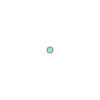

In [8]:
ponto

Vamos imprimir e ver o tipo do objeto para ver a sua definição:

In [5]:
print(ponto)

POINT (5 10)


In [6]:
type(ponto)

shapely.geometry.point.Point

Também podemos definir pontos de três dimensões.

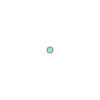

In [7]:
ponto3D = Point(5, 10, 3)
ponto3D

In [8]:
print(ponto3D)

POINT Z (5 10 3)


### Ponto - Atributos e funções

Os objetos do tipo `Point` já possuem atributos e funções internas para realizar operações básicas. Uma das funções mais simples é a capacidade de extrair as coordenadas e a possibilidade de calcular a distância entre dois pontos.

Podemos obter as coordenadas x e y de diferentes maneiras: 

In [9]:
# utilizando a função coords
list(ponto.coords)

[(5.0, 10.0)]

In [10]:
# lendo x e y separadamente
x = ponto.x
y = ponto.y
print(x, y)

5.0 10.0


Também podemos calcular a distância entre dois pontos:

In [11]:
ponto_1 = Point(2,3)
ponto_2 = Point(5,7)

distancia = ponto_1.distance(ponto_2)

print("Distância entre os pontos:", distancia)

Distância entre os pontos: 5.0


## 1.2. Linha (_LineString_)

![Exemplo de aplicações com Ponto](imagens/linha-exemplo-app.png)

Criar um objeto `LineString` é parecido com a criação objeto `Point`. 

Agora, em vez de usar uma única tupla de coordenadas, nós podemos contruir uma linha usando uma lista de `Point` ou um vetor de tuplas com as respectivas coordenadas:

In [12]:
# criar uma linha a partir de objetos pontos 
ponto_1 = Point(2,3)
ponto_2 = Point(5,7)
ponto_3 = Point(2,10)

linha = LineString([ponto_1, ponto_2, ponto_3])

Vamos ver como a variável do tipo `LineString` é mostrada no jupyter:

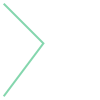

In [13]:
linha

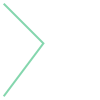

In [14]:
# também podemos criar um LineString com as respectivas coordenadas
linha_2 = LineString([(2,3), (5,7), (2,10)])
linha_2

In [15]:
# vamos imprimir e comparar as duas linhas
print("linha 1:", linha)
print("linha 2:", linha_2)

linha 1: LINESTRING (2 3, 5 7, 2 10)
linha 2: LINESTRING (2 3, 5 7, 2 10)


In [16]:
linha == linha_2

True

Vamos imprimir e ver o tipo do objeto linha para ver a sua definição:

In [17]:
print(linha)

LINESTRING (2 3, 5 7, 2 10)


In [18]:
type(linha)

shapely.geometry.linestring.LineString

### Linha - Atributos e funções

O objeto `LineString` possui diversos atributos e funções internas. Algumas operações possíveis com o objeto do tipo linha:

- extrair as coordenadas;
- calcular o tamanho da linha;
- calcular o ponto médio (centróide).

A lista completa de funcionalidades pode ser acessada na [documentação da biblioteca](https://shapely.readthedocs.io/en/latest/manual.html#linestrings). 

Vamos ver algumas dessas funções.

Nós podemos extrair as coordenadas da `LineString` similar ao objeto `Point`.

In [19]:
# utilizando a função coords
list(linha.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0)]

In [20]:
# lendo x e y separadamente
coordenadas_x = list(linha.xy[0])
coordenadas_y = list(linha.xy[1])

print('coordenadas x:', coordenadas_x)
print('coordenadas y:', coordenadas_y)

coordenadas x: [2.0, 5.0, 2.0]
coordenadas y: [3.0, 7.0, 10.0]


Também é possível obter o tamanho da linha e o ponto central (centróide) diretamente do objeto:

In [21]:
# pegar o tamanho da linha
tamanho = linha.length

#print("Tamanho da linha:", tamanho)
print("Tamanho da linha: {:.2f}".format(tamanho))

Tamanho da linha: 9.24


In [22]:
# obter o ponto central (centróide)
centroide = linha.centroid

print(centroide)

POINT (3.5 6.606601717798214)


## 1.3. Polígono (_Polygon_)

![Exemplo de aplicações com Poligono](imagens/poligono-exemplo-app.png)

Podemos criar um objeto `Polygon` usando a mesma lógica do `Point` e `LineString`, porém a criação do objeto `Polygon` só aceita uma sequência de coordenadas.

Para criar um polígono são necessários __pelo menos três coordenadas__.

In [23]:
# criar um Polygon passando as coordenadas
poligono = Polygon([(2,3), (5,7), (2,10)])

Vamos ver como a variável do tipo `Polygon` é mostrada no jupyter:

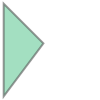

In [24]:
poligono

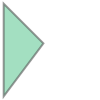

In [25]:
# também podemos criar um polygon usando nossos objetos Point criados anteriormente com list comprehension.
poligono_2 = Polygon([[ponto.x, ponto.y] for ponto in [ponto_1, ponto_2, ponto_3]])

poligono_2

Para entender o resultado vamos ver o resultado da operação anterior

In [26]:
[[ponto.x, ponto.y] for ponto in [ponto_1, ponto_2, ponto_3]]

[[2.0, 3.0], [5.0, 7.0], [2.0, 10.0]]

In [27]:
# vamos imprimir e comparar os dois polygons
print("polígono 1:", poligono)
print("polígono 2:", poligono_2)

polígono 1: POLYGON ((2 3, 5 7, 2 10, 2 3))
polígono 2: POLYGON ((2 3, 5 7, 2 10, 2 3))


In [28]:
poligono == poligono_2

True

Vamos imprimir e ver o tipo do objeto linha para ver a sua definição:

In [29]:
print(poligono)

POLYGON ((2 3, 5 7, 2 10, 2 3))


In [30]:
type(poligono)

shapely.geometry.polygon.Polygon

Perceba que a representação do `Polygon` possui dois parentesis ao redor das coordendas (ex.: `POLYGON ((<coordenadas>))`). Isso acontece porque o objeto `Polygon` pode ter aberturas (buracos) dentro dele. Vamos definir o mesmo polígono com uma abertura interna.

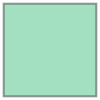

In [31]:
# vamos criar um quadro maior
quadrado = Polygon([(0, 0), (0, 10), (10, 10), (10, 0)])

quadrado

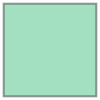

In [32]:
# vamos criar um quadro menor
quadrado_menor = Polygon([(2.5, 2.5), (2.5, 7.5), (7.5, 7.5), (7.5, 2.5)])

quadrado_menor

Como pegar as coordenadas do polígono?

In [33]:
list(quadrado.exterior.coords)

[(0.0, 0.0), (0.0, 10.0), (10.0, 10.0), (10.0, 0.0), (0.0, 0.0)]

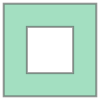

In [34]:
# criar o polígono combinando os dois quadrados
poligono_buraco = Polygon(shell=list(quadrado.exterior.coords), 
                          holes=[list(quadrado_menor.exterior.coords)])

poligono_buraco

In [35]:
print(poligono_buraco)

POLYGON ((0 0, 0 10, 10 10, 10 0, 0 0), (2.5 2.5, 2.5 7.5, 7.5 7.5, 7.5 2.5, 2.5 2.5))


### Polígonos - Atributos e funções

Podemos acessar diferentes funções diretamente do objeto `Polygon`, que são úteis para muitas tarefas e análises, como: obter área, centróide, _bounding box_, o exterior e o perímetro (tamanho exterior).

Aqui, podemos ver alguns atributos disponíveis e como acessá-los:

In [36]:
# calcular a área
poligono_area = quadrado.area

print("Área:", poligono_area)

Área: 100.0


In [37]:
# pegar o centroide do polígono
poligono_centroid = quadrado.centroid

print("Centróide:", poly_centroid)

NameError: name 'poly_centroid' is not defined

In [38]:
# obter as coordenadas dos pontos de fronteira (bounding box)
poligono_bbox = quadrado.bounds

print("Bounding Box:", poligono_bbox)

Bounding Box: (0.0, 0.0, 10.0, 10.0)


In [39]:
# pegar as coordenadas da linha exterior
poligono_exterior = quadrado.exterior

print("Exterior:", poligono_exterior)

Exterior: LINEARRING (0 0, 0 10, 10 10, 10 0, 0 0)


In [40]:
# obter o tamanho da linha exterior
poligono_exterior_length = quadrado.exterior.length

print("Comprimento exterior:", poligono_exterior_length)

Comprimento exterior: 40.0


# 2. Operações básicas entre geometrias

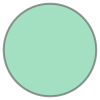

In [53]:
# vamos criar dois círculos
circulo_1 = Point(1,1).buffer(1)
circulo_2 = Point(2,1).buffer(1)

circulo_2

Vamos mostrar os dois círculos com a biblioteca matplotlib

In [68]:
# importar a biblioteca matplotlib
import matplotlib.pyplot as plt

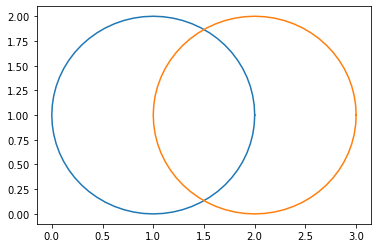

In [57]:
# plotar o círculo 1 
x,y = circulo_1.exterior.xy
plt.plot(x,y)

# plotar o círculo 2
x,y = circulo_2.exterior.xy
plt.plot(x,y)

plt.show()

## 2.1. Interseção

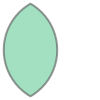

In [59]:
# operação de interseção
circulo_inter = circulo_1.intersection(circulo_2)

circulo_inter

## 2.2. União

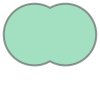

In [62]:
# operação de união
circulo_union = circulo_1.union(circulo_2)

circulo_union

## 2.3. Diferença

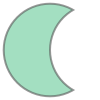

In [63]:
# operação de diferença
circulo_diff_1 = circulo_1.difference(circulo_2)

circulo_diff_1

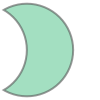

In [64]:
# operação de diferença
circulo_diff_2 = circulo_2.difference(circulo_1)

circulo_diff_2

## 2.4. Diferença Simétrica

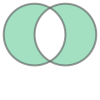

In [67]:
# operação de diferença simétrica
circulo_diffsim = circulo_1.symmetric_difference(circulo_2)

circulo_diffsim

## Resumo

Nesta aula nós vimos como criar objetos geométricos com a biblioteca shapely. Mais especificamente 
voce deve ter aprendido:

**1)** Criar objetos de pontos, linhas e polígonos;

**2)** Usar funções básicas dos objetos geométricos;

**3)** Realizar operações entre geometrias.